<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

### Learning Objectives
 
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cyclical, and residual).
- Decompose time series data into trend, seasonality, cyclical, and residual components.
- Plot the decomposed components of a time series.

### Lesson Guide

#### Decomposition
- [Time Series Decomposition](#A)
- [Decompose a Time Series](#B)
- [Plotting the Residuals and the ACF and PACF of the Residuals](#C)
- [Independent Practice](#D)
----

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

- **Residual**: The leftover or error component.

**Example:**

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Multiplicative-Decomposition-of-Airline-Passenger-Dataset.png" style="center: left; margin: 20px; height: 350px">

[Source](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

### Guided Practice

We are going to play around with some bus data from Portland, Oregon. Load in the data set below and check it out.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

bus = pd.read_csv('./datasets/bus.csv')
bus.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [2]:
bus.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


We'll need to clean this data a little. Let's simplify the names of the columns. There are also a couple of bad rows at the end of the file. We'll get rid of those. Additionally, we need to make the `riders` column an integer. 

In [3]:
bus.drop(bus.index[115], inplace=True)
bus.drop(bus.index[114], inplace=True)
bus.columns = ['index','riders']
bus['riders'] = bus.riders.apply(lambda x: int(x))
bus.head()

,index,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


We're going to create an artificial date index using the `relativedelta()` function, as shown below. We will simply start at `1973-01-01` and iterate up one month at a time.

In [4]:
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,114)]
bus['index'] = date_list
bus.set_index(['index'], inplace=True)
bus.index.name = None

bus.head() 

,riders
1973-01-01,648
1973-02-01,646
1973-03-01,639
1973-04-01,654
1973-05-01,630


### StatsModels Time Series Tools 

The Python StatsModels library offers a wide variety of reliable time series analysis tools. We'll start off by loading the autocorrelation and partial autocorrelation functions, as well as a function for decomposing time series.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

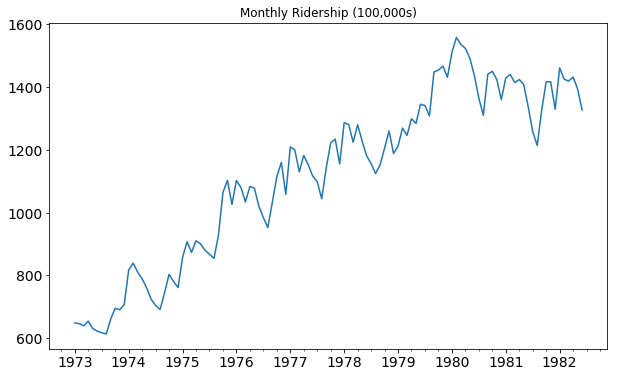

In [6]:
bus.riders.plot(figsize=(10,6), title='Monthly Ridership (100,000s)', fontsize=14);

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

<Figure size 432x288 with 0 Axes>

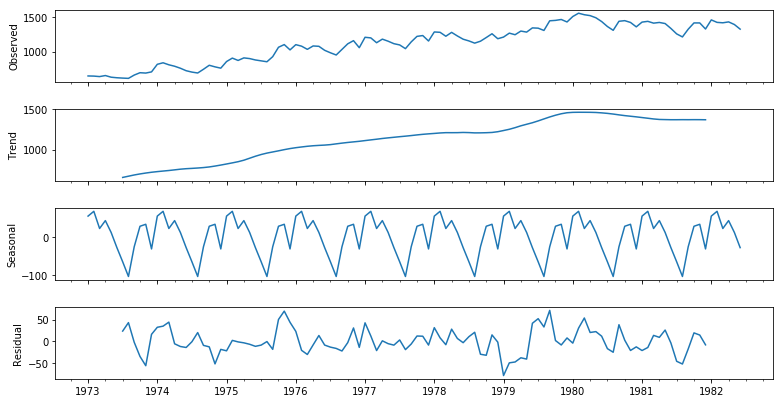

In [7]:
decomposition = seasonal_decompose(bus.riders, freq=12) 
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

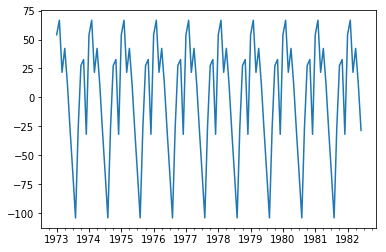

In [8]:
seasonal = decomposition.seasonal 
seasonal.plot();

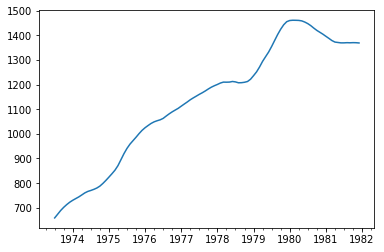

In [9]:
trend = decomposition.trend
trend.plot();

<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

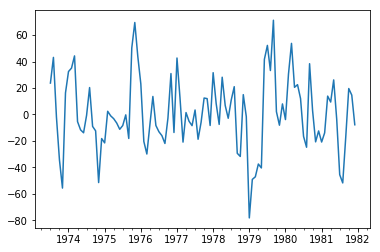

In [10]:
resid = decomposition.resid
resid.plot();

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

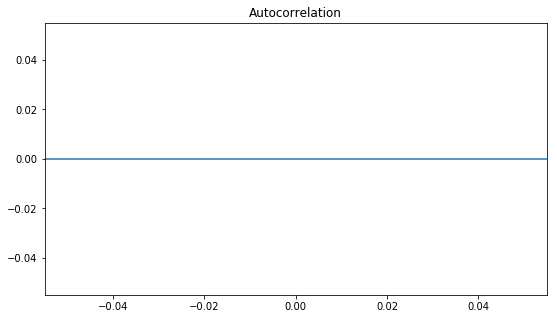

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(resid, lags=30, ax = ax)
plt.show()

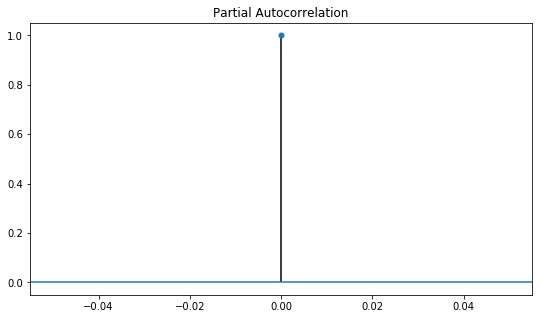

In [13]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid, lags=30, ax=ax)
plt.show()

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

# Recap

* Trend is a long-term change in the data. 
* Seasonality is a pattern of a fixed period that repeats in the data. 
* Residuals are the error components of the data.
* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.

<h2><a id="D">Independent Practice</a></h2>

**Instructor Note**: These are optional and can be undertaken as student practice questions outside of class.

### 1) Import the Airline Passengers data set, preprocess the data, and plot the raw time series.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

In [15]:
airline = pd.read_csv('./datasets/airline.csv')

### 2) Decompose the time series and plot using the `.seasonal_decompose()` function.

### 3) Interpret these plots.